In [5]:
from graph_traffic.get_data import get_data, ubs_index
from graph_traffic.dataloading import npzDataset
from graph_traffic.model_selection import timeseries_cv, plot_predictions_from_features, train_estimators_by_sensor
import numpy as np
from random import choices
from sklearn.ensemble import HistGradientBoostingRegressor
from graph_traffic.custom_transformer import get_column_names
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False

data_dict = dict(
    ids_list=[3954, 3973, 3978],
    seq_len=12*4,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2019-12-31",
    dataset_name="small",
    target="intensidad",
    interactions="drop"
)

meteo_dict = dict(
    rain="ordinal",
    wind="wind_speed",
    temperature="passthrough",
    humidity="drop",
    pressure="drop",
    radiation="passthrough"
)

temporal_dict = dict(
    year="drop",
    season="drop",
    month="passthrough",
    day_of_month="drop",
    weekday="passthrough",
    hour="passthrough",
    minute="passthrough",
    bank_holiday="passthrough",
    school_holiday="passthrough",
    working_day="passthrough",
)

get_data(data_dict, meteo_dict, temporal_dict)
dataset_name = data_dict["dataset_name"]
n_points = None

train_data = npzDataset(dataset_name, "train", n_points)
test_data = npzDataset(dataset_name, "test", n_points)

train_x = train_data.x
train_y = train_data.y
column_names = get_column_names(meteo_dict, temporal_dict, data_dict["interactions"], data_dict["target"])

_, ubs_dict = ubs_index(data_dict["ids_list"])

test_x = test_data.x
test_y = test_data.y
random_samples = choices(range(test_x.shape[0]), k=2)
random_samples

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[4962, 4888]

[3131, 3187]

In [6]:
categorical_features = [1, 2, 3, 4, 5, 6]
#categorical_features = [1]

In [9]:
estimators = train_estimators_by_sensor(data_dict["ids_list"], train_x, HistGradientBoostingRegressor(categorical_features=categorical_features))

40.969855248224775 71.3415942679342
20.209930085560902 34.455144761902446
34.46068366072867 59.279691672706306


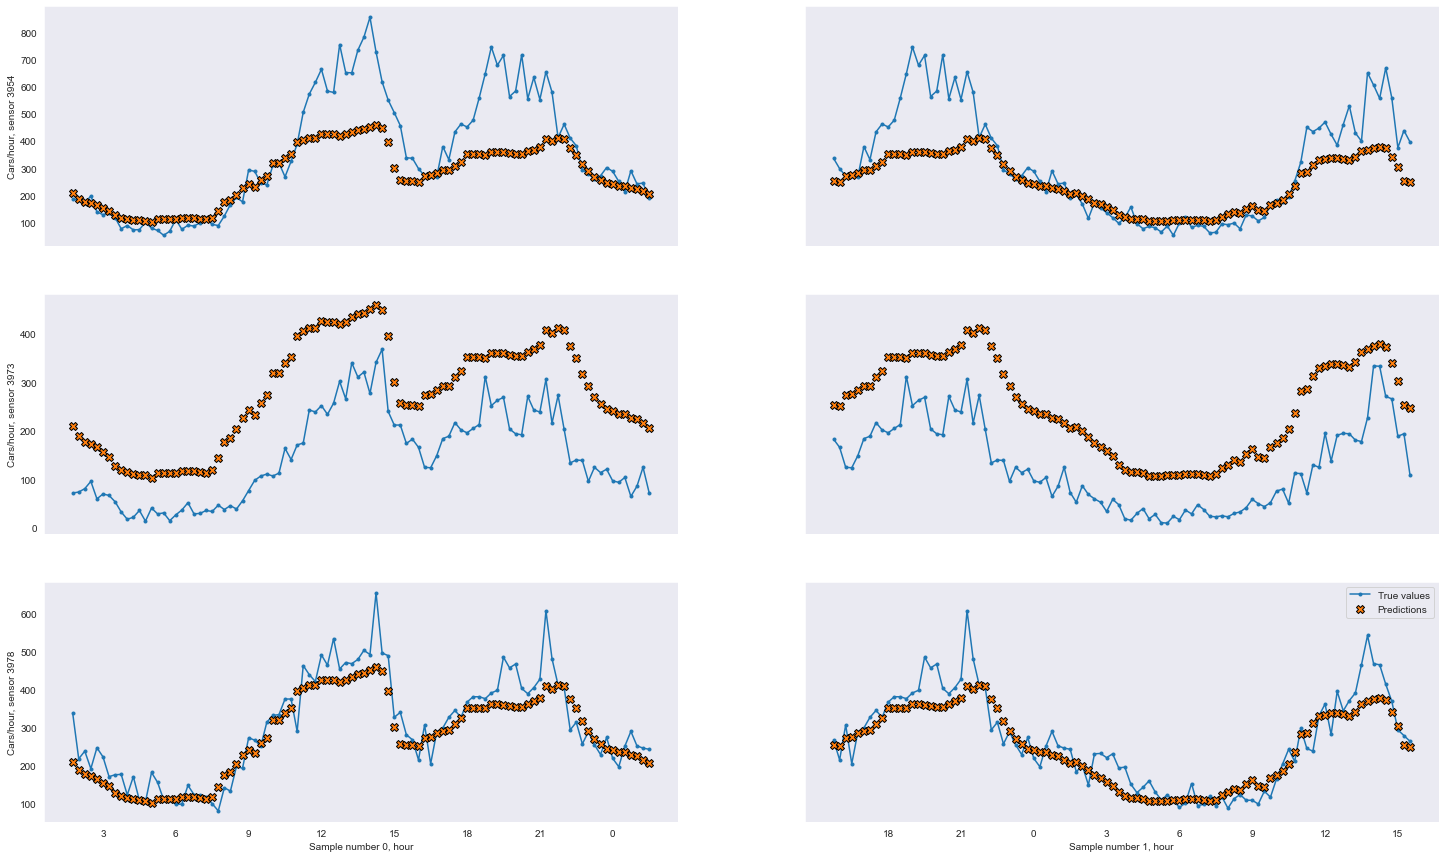

In [11]:
plot_predictions_from_features(estimators, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"])